# Lab Notebook: Exploring DBSCAN Clustering

## Introduction

In this lab, we will explore DBSCAN (Density-Based Spatial Clustering of Applications with Noise), a powerful clustering algorithm. Unlike traditional clustering methods like K-Means, DBSCAN does not require specifying the number of clusters beforehand and can identify clusters of arbitrary shapes. Additionally, DBSCAN is robust to noise and outliers.

We'll start by understanding the basic concepts of DBSCAN and then dive into how varying the key parameters (`eps` and `min_samples`) affects the clustering outcome. We will also discuss concepts like cluster purity, inter-cluster, and intra-cluster distances to evaluate the quality of the clusters formed.

## Core Concepts

- **eps (Epsilon):** Defines the radius of the neighborhood around a point. Points within this radius are considered neighbors.
- **min_samples:** Minimum number of points required to form a dense region (i.e., a cluster).
- **Core Point:** A point is considered a core point if it has at least `min_samples` points within its `eps` neighborhood.
- **Border Point:** A point that is within the `eps` neighborhood of a core point but has fewer than `min_samples` points in its own `eps` neighborhood.
- **Noise Point:** A point that is neither a core point nor a border point.

Let's start by generating a simple dataset and applying DBSCAN with different `eps` and `min_samples` values to observe their effects.

## Step 1: Import Libraries and Generate Dataset



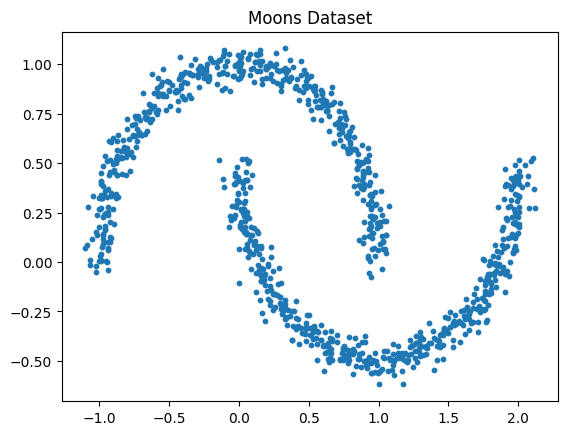

In [22]:
# Import necessary libraries
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
import numpy as np
import matplotlib.pyplot as plt

# Generate a synthetic "moons" dataset
X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)

# Plot the dataset to visualize it
plt.scatter(X[:, 0], X[:, 1], s=10)
plt.title("Moons Dataset")
plt.show()


### Description:

We start by generating a simple dataset using Scikit-Learn’s `make_moons` function. This dataset is two-dimensional and consists of two interleaving half circles, making it ideal for testing the DBSCAN algorithm.

## Step 2: Apply DBSCAN with Different `eps` Values


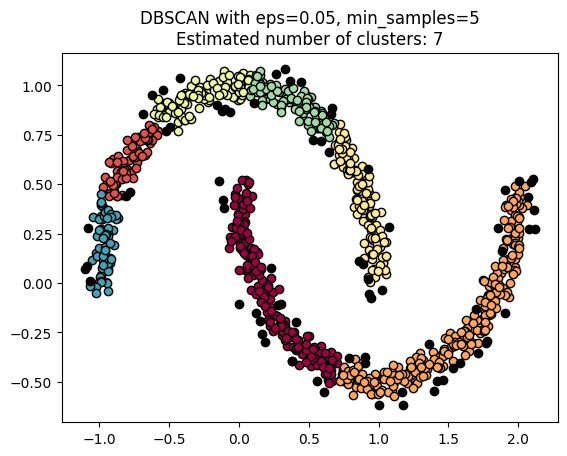

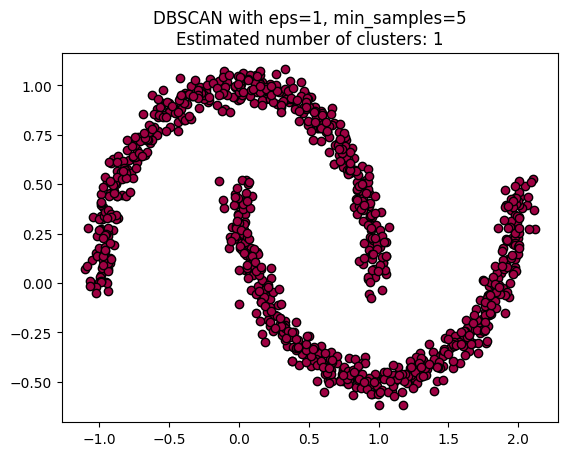

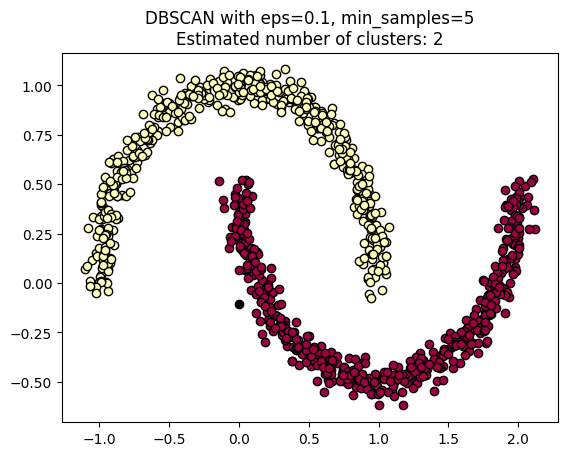

In [23]:
# Function to apply DBSCAN and plot results
def apply_dbscan(eps, min_samples):
    # Initialize DBSCAN with given parameters
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)

    # Fit DBSCAN to the data
    dbscan.fit(X)

    # Get the labels assigned by DBSCAN
    labels = dbscan.labels_

    # Number of clusters, ignoring noise (-1 label)
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

    # Plot the clustering results
    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise
            col = [0, 0, 0, 1]

        class_member_mask = (labels == k)

        xy = X[class_member_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=6)

    plt.title(f'DBSCAN with eps={eps}, min_samples={min_samples}\nEstimated number of clusters: {n_clusters}')
    plt.show()

# Test DBSCAN with different eps values
apply_dbscan(eps=0.05, min_samples=5)
apply_dbscan(eps=1, min_samples=5)
apply_dbscan(eps=0.1, min_samples=5)


### Description:

We created a function to apply DBSCAN with given `eps` and `min_samples` values and visualize the clustering results. Here, we test three different `eps` values while keeping `min_samples` constant. Notice how increasing `eps` affects the number of clusters formed and the number of points labeled as noise.

## Step 3: Analyze the Impact of `min_samples`


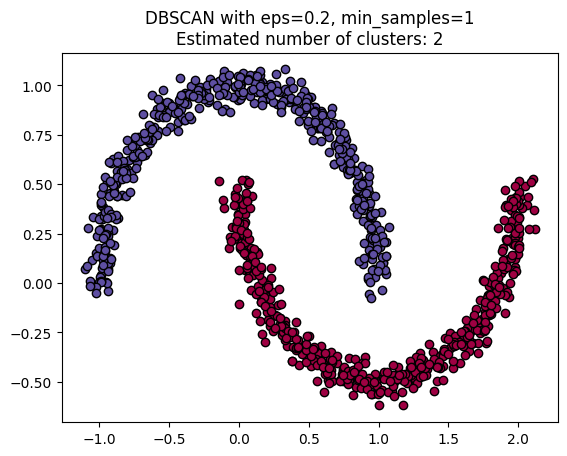

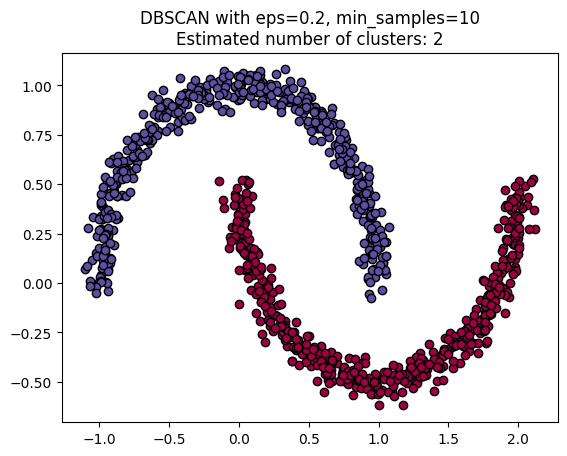

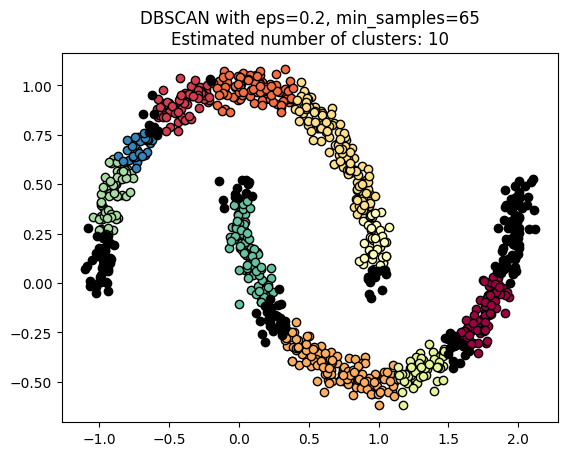

In [24]:
# Test DBSCAN with different min_samples values
apply_dbscan(eps=0.2, min_samples=1)
apply_dbscan(eps=0.2, min_samples=10)
apply_dbscan(eps=0.2, min_samples=65)


### Description:

Now, let's keep `eps` constant and vary the `min_samples` parameter. Observe how changing `min_samples` affects the formation of clusters. A lower `min_samples` value tends to form more clusters with fewer points, while a higher `min_samples` value may result in fewer clusters, sometimes merging smaller clusters or treating them as noise.

## Step 4: Discussion on Cluster Quality

To evaluate the quality of clusters, we introduce concepts like cluster purity, inter-cluster distance, and intra-cluster distance.

- **Intra-cluster Distance:** Measures how close the points within a cluster are to each other.
- **Inter-cluster Distance:** Measures how far apart different clusters are from each other.
- **Cluster Purity:** Reflects the homogeneity of the clusters. A pure cluster contains points that are very similar to each other.

For a good clustering outcome, we aim for low intra-cluster distances, high inter-cluster distances, and high cluster purity.

## Step 5: Evaluating Cluster Purity (Optional Advanced Concept)


In [25]:
from sklearn.metrics import silhouette_score

# Calculate and print the silhouette score for the current clustering
def evaluate_clustering(eps, min_samples):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(X)

    # Silhouette score: Measures how close each point in a cluster is to the points in the neighboring clusters
    if len(set(labels)) > 1:  # Silhouette score is undefined for a single cluster
        score = silhouette_score(X, labels)
        print(f'Silhouette Score for eps={eps}, min_samples={min_samples}: {score:.2f}')
    else:
        print(f'Silhouette Score is undefined for eps={eps}, min_samples={min_samples} due to single cluster.')

# Evaluate clusters formed by DBSCAN with different settings
evaluate_clustering(eps=0.02, min_samples=5)
evaluate_clustering(eps=0.2, min_samples=10)
evaluate_clustering(eps=0.2, min_samples=65)


Silhouette Score for eps=0.02, min_samples=5: -0.69
Silhouette Score for eps=0.2, min_samples=10: 0.33
Silhouette Score for eps=0.2, min_samples=65: 0.26


### Description:

The silhouette score is one way to measure the quality of clustering. A high silhouette score indicates that clusters are well separated from each other, and the points within each cluster are close together.



we explored how the `eps` and `min_samples` parameters affect DBSCAN clustering. We observed that:

- Smaller `eps` values lead to more clusters and potentially more noise.
- Larger `eps` values can merge clusters and reduce noise.
- Smaller `min_samples` values make the algorithm more sensitive to noise and create more clusters.
- Larger `min_samples` values result in fewer clusters with more points potentially labeled as noise.

Finally, we discussed cluster purity and used the silhouette score to evaluate the clustering quality. This lab provided a foundation for understanding DBSCAN and its behavior under different parameter settings.


# Lab Notebook: Exploring Hierarchical Clustering on the Moons Dataset
**Introduction**

In this lab, we will explore Hierarchical Clustering using both Agglomerative and Divisive approaches. Hierarchical clustering creates a hierarchy of clusters, visualized using a dendrogram. We will also explore how to determine the optimal number of clusters using the silhouette score and dendrogram analysis.
# Step 1: Import Libraries and Generate Dataset

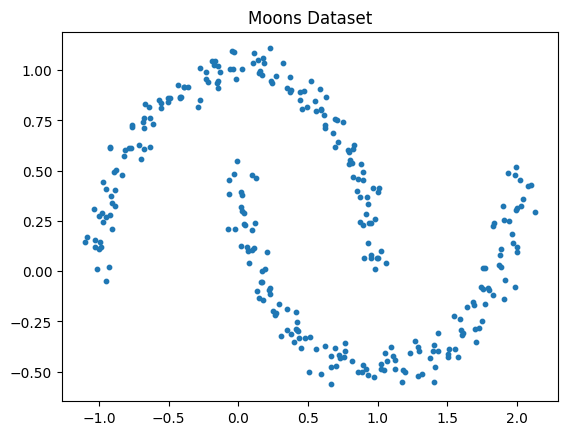

In [26]:
# Import necessary libraries
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Generate a synthetic "moons" dataset
X, y = make_moons(n_samples=300, noise=0.05, random_state=42)

# Plot the dataset to visualize it
plt.scatter(X[:, 0], X[:, 1], s=10)
plt.title("Moons Dataset")
plt.show()


# Step 2: Agglomerative Clustering with Dendrogram
Agglomerative Clustering starts by treating each point as its own cluster and then merges the closest clusters step by step until all points belong to one cluster.

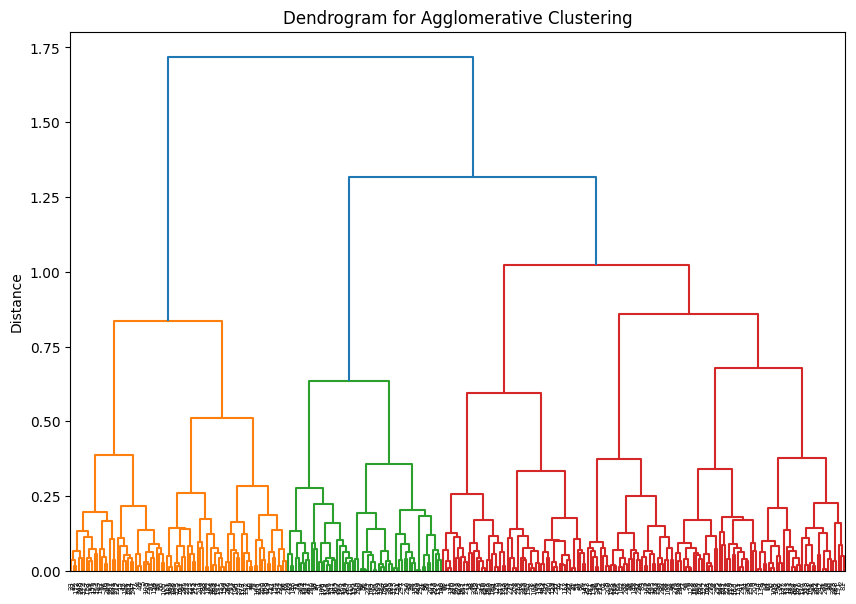

In [27]:
from scipy.cluster.hierarchy import ward

# Perform hierarchical/agglomerative clustering using Ward's method
methods = ['single', 'complete', 'average', 'centroid']
linkage_matrix = linkage(X, method=methods[2])

# Plot the dendrogram to visualize the cluster formation
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)
plt.title("Dendrogram for Agglomerative Clustering")
plt.ylabel("Distance")
plt.show()


**Explanation:** The dendrogram helps visualize the point at which clusters are merged. The y-axis represents the distance or dissimilarity between clusters

# Step 3: Divisive Clustering

Divisive Clustering works the opposite way. It starts with all points in a single cluster and then splits them recursively.

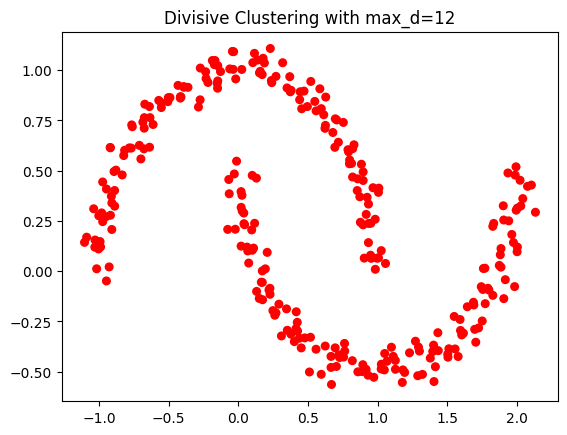

In [28]:
from scipy.cluster.hierarchy import fcluster

# Use fcluster to apply divisive clustering and cut the tree at a certain threshold
max_d = 12  # Maximum distance threshold
clusters = fcluster(linkage_matrix, max_d, criterion='distance')

# Plot the results of divisive clustering
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='prism', s=30)
plt.title(f'Divisive Clustering with max_d={max_d}')
plt.show()


Explanation: We use the fcluster method to create flat clusters from the dendrogram by cutting it at a specific distance.
# Step 4: Cluster Distance Measurements

Cluster Distance Measurement Methods:


*  Single Linkage: Minimum distance between points in two clusters.

*  Complete Linkage: Maximum distance between points in two clusters.


*  Average Linkage: Average distance between all pairs of points in two clusters.

*  Ward's Method: Minimizes the variance within clusters.
   







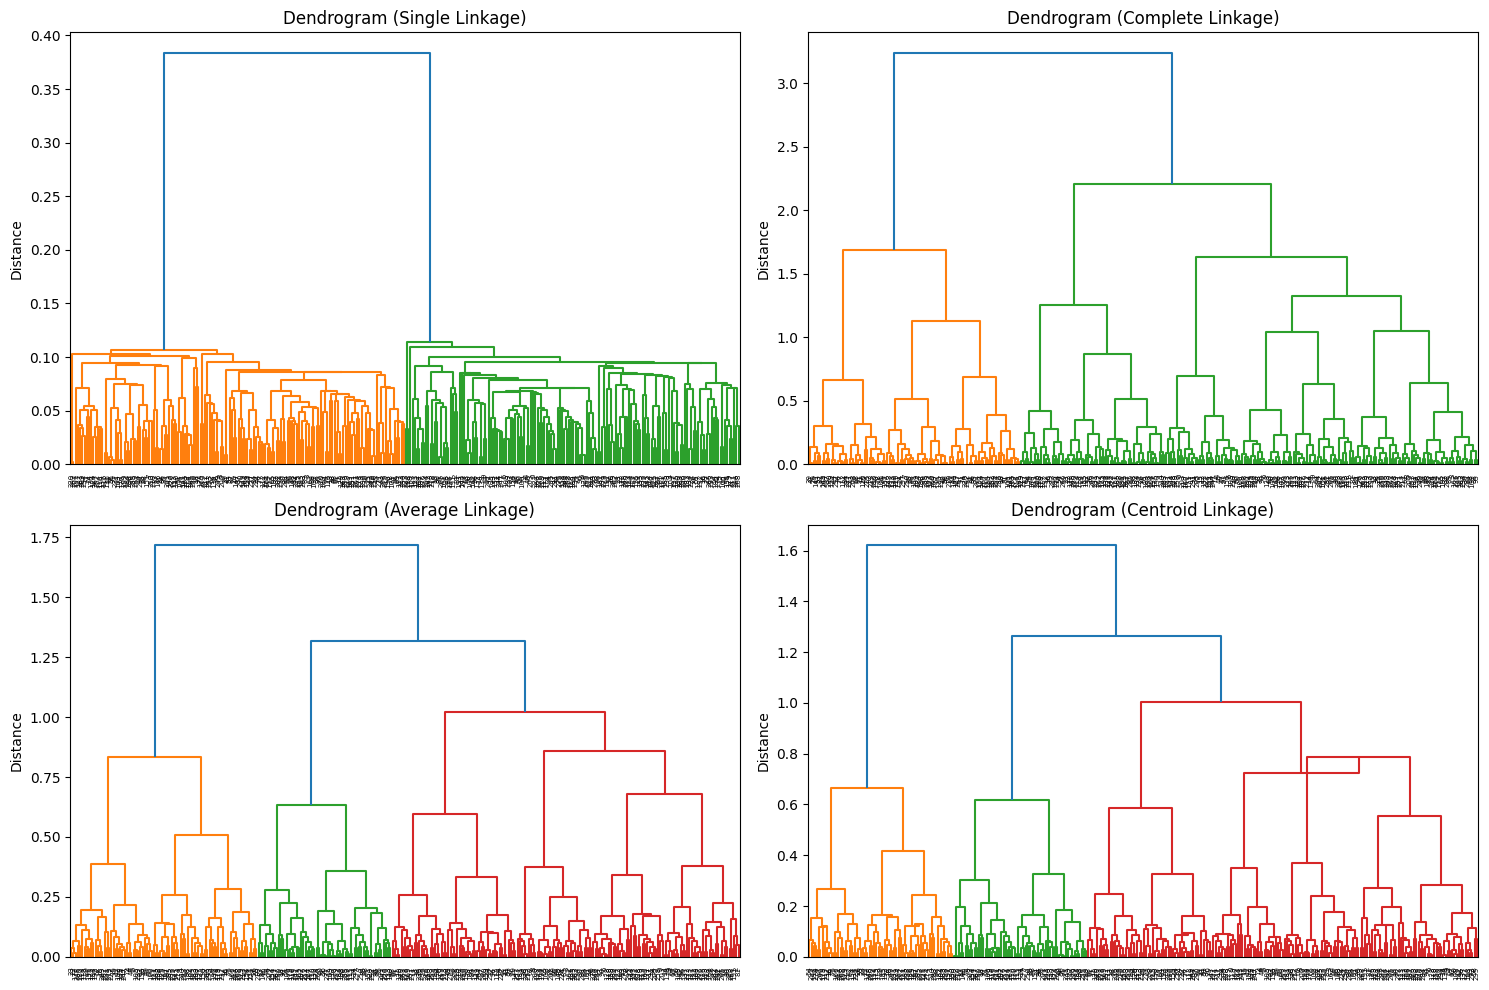

In [29]:
from scipy.cluster.hierarchy import linkage

# Test different linkage methods
methods = ['single', 'complete', 'average', 'centroid']

plt.figure(figsize=(15, 10))
for i, method in enumerate(methods, 1):
    plt.subplot(2, 2, i)
    linkage_matrix = linkage(X, method=method)
    dendrogram(linkage_matrix)
    plt.title(f'Dendrogram ({method.capitalize()} Linkage)')
    plt.ylabel("Distance")

plt.tight_layout()
plt.show()


**Explanation:** Different linkage methods affect the shape of the dendrogram and, consequently, the resulting clusters.

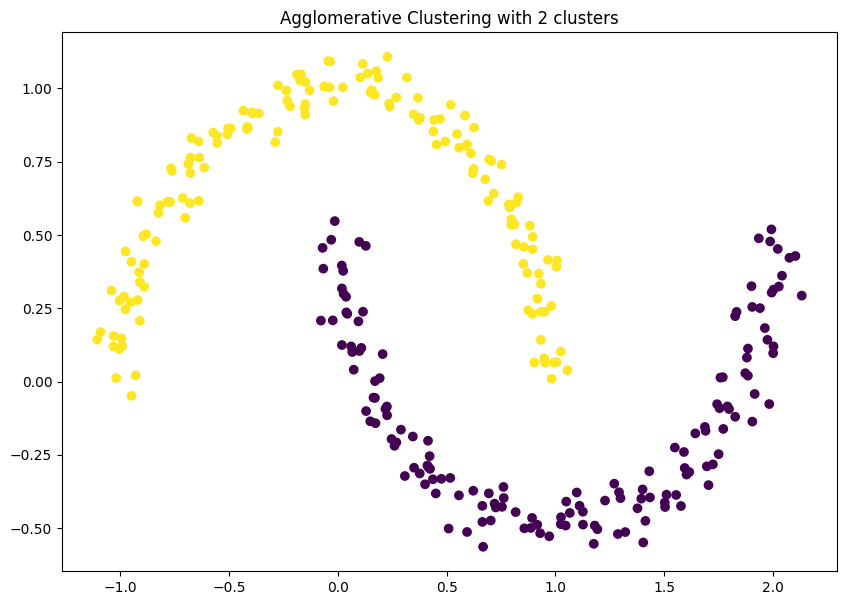

In [30]:
# Set the number of clusters
n_clusters = 2

# Create an AgglomerativeClustering object
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters,linkage="single")

# Fit the model and predict cluster labels
labels = agg_clustering.fit_predict(X)

# Visualize the results
plt.figure(figsize=(10, 7))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.title(f'Agglomerative Clustering with {n_clusters} clusters')
plt.show()



*   Divisive clustering: Used a distance threshold (max_d) to cut the dendrogram.

*   Agglomerative clustering: Specified the number of clusters directly (n_clusters).




# Step 5: Determining the Optimal Number of Clusters

Silhouette Score and Dendrogram Analysis are useful for determining the optimal number of clusters.

For n_clusters=2, the average silhouette score is 0.331
For n_clusters=3, the average silhouette score is -0.029
For n_clusters=4, the average silhouette score is -0.198
For n_clusters=5, the average silhouette score is 0.011


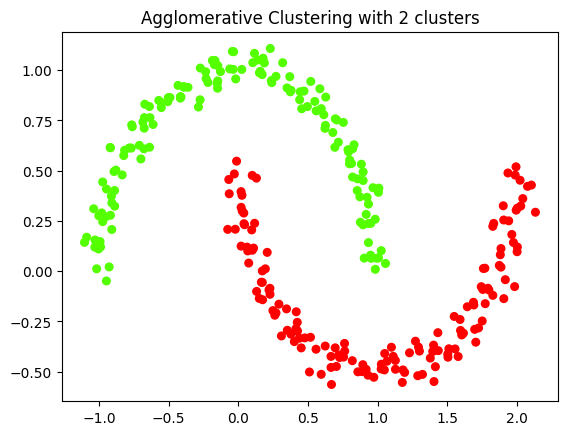

In [31]:
methods = ['single', 'complete', 'average', 'centroid']

# Evaluate silhouette score for a range of cluster counts using Agglomerative Clustering
for n_clusters in range(2, 6):
    agg_clustering = AgglomerativeClustering(n_clusters=n_clusters,linkage=methods[0])
    labels = agg_clustering.fit_predict(X)
    silhouette_avg = silhouette_score(X, labels)
    print(f"For n_clusters={n_clusters}, the average silhouette score is {silhouette_avg:.3f}")

# Cut the dendrogram to get a specific number of clusters
optimal_clusters = 2  # Determined by silhouette score
agg_clustering = AgglomerativeClustering(n_clusters=optimal_clusters,linkage=methods[0])
labels = agg_clustering.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='prism', s=30)
plt.title(f'Agglomerative Clustering with {optimal_clusters} clusters')
plt.show()


**Explanation**: The silhouette score indicates how well-separated the clusters are. The higher the score, the better defined the clusters.

**Conclusion**

In this lab, we explored Hierarchical Clustering using both Agglomerative and Divisive methods on the moons dataset. We visualized the cluster formation using dendrograms and compared different linkage methods. Finally, we determined the optimal number of clusters using silhouette scores and dendrogram analysis.